# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning and Preparation

## Load Data

In [2]:
# load data
boston = pd.read_csv('/Users/hayaayu/Users/hayaayu/Self Development/Data Science/Dibimbing/Day17/HW Data/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The data is about predicting housing price (medv) in Boston city, features:
- Criminal rate (crim)
- Residential land zoned proportion (zn)
- Non-retail business acres proportion (indus)
- Is bounds with river (chas)
- Nitrogen oxides concentration (nox)
- Number rooms average (rm)
- Owner age proportion (age)
- Weighted distance to cities (dis)
- Accessibility index (rad)
- Tax rate (tax)
- Pupil-teacher ratio (ptratio)
- Black proportion (black)
- Percent lower status (lstat)

## Sample Data

In [4]:
# Showing top 5 rows of the data
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
boston.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
440,22.05110,0.0,18.10,0,0.740,5.818,92.4,1.8662,24,666,20.2,391.45,22.11,10.5
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6


**Observations:**
- All Columns are numeric.
- `chas` is binary column (1 and 0).
- `tax` `rad` contain discrete values and the rest columns contain continues value.
- No obvious defect.

## General Information & Missing Values

In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
# number of missing values per column
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

**Observations :**
- There's no missing values

## Duplicated Data

In [12]:
# number of duplicated data
boston.duplicated().sum()

0

**Observations :**
- There's no duplicated data and all good to go.

# Split Data

In [49]:
# split train test
from sklearn.model_selection import train_test_split

feature = boston.drop(columns='medv')
target = boston[['medv']]

feature_boston_train, feature_boston_test, target_boston_train, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Multicollinearity Study

## VIF Score

In [51]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


There are some features with high vif score, however we need to visualize with heatmap to decide which feature to drop.

## Heatmap Corr

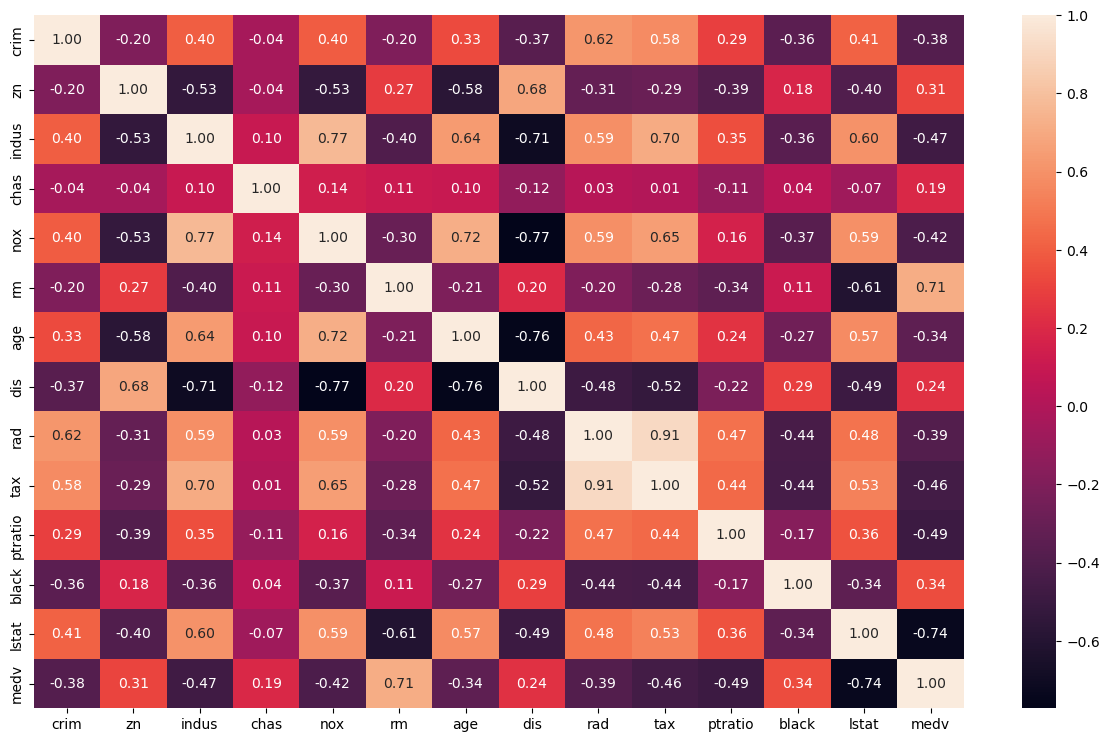

In [53]:
# heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

**Observations :**
- There are two features with high multicollinearity : `tax` and `rad` 0.91.
- We'll drop the `rad`, since `tax` has higher correlation with target variable.

In [54]:
#Dropping Feature

feature_boston_train = feature_boston_train.drop(columns=['rad']) 
feature_boston_test = feature_boston_test.drop(columns=['rad'])

## Recheck VIF

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.593872
2,zn,2.413664
3,indus,3.658237
4,chas,1.084671
5,nox,4.411973
6,rm,1.884987
7,age,2.977080
8,dis,4.166015
9,tax,3.331299
10,ptratio,1.776290


All good!

# Model Training

## Ridge Regression

In [68]:
from sklearn.linear_model import Ridge

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
ridge_reg = Ridge(alpha=0.1, 
                  random_state=42)

ridge_reg.fit(X_boston_train, y_boston_train)

Ridge(alpha=0.1, random_state=42)

In [69]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_boston_train
model = ridge_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,23.518308
1,crim,-0.081022
2,zn,0.022474
3,indus,-0.019493
4,chas,3.093697
5,nox,-14.404510
6,rm,4.729954
7,age,-0.010476
8,dis,-1.412181
9,tax,0.000750


**Observations :**
- There are features with high coefficients.
- An increase of 1 point in `intercept`, while the other features are kept fixed, is associated with an increase of 23.5 point in `medv`.
- An increase of 1 point in `nox`, while the other features are kept fixed, is associated with an decrease of -14.4 point in `medv`.
- An increase of 1 point in `rm`, while the other features are kept fixed, is associated with an increase of 4.7 point in `medv`.
- An increase of 1 point in `chas`, while the other features are kept fixed, is associated with an increase of 3.09 point in `medv`.

## Lasso Regression

In [70]:
from sklearn.linear_model import Lasso

# define the model
lasso_reg = Lasso(alpha=0.1, 
                  random_state=42)

lasso_reg.fit(X_boston_train, y_boston_train)

Lasso(alpha=0.1, random_state=42)

In [71]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_boston_train
model = lasso_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.425577
1,crim,-0.075710
2,zn,0.027093
3,indus,-0.061336
4,chas,1.266833
5,nox,-0.000000
6,rm,4.564419
7,age,-0.016919
8,dis,-1.155550
9,tax,-0.002088


**Observations :**
- There are features with high coefficients.
- An increase of 1 point in `intercept`, while the other features are kept fixed, is associated with an increase of 15.4 point in `medv`.
- An increase of 1 point in `rm`, while the other features are kept fixed, is associated with an increase of 4.56 point in `medv`.

## Workflow with Choosing the Best Lambda

### 1. Split Data : Train-Validation-Set

In [72]:
# split train test
from sklearn.model_selection import train_test_split

feature = boston.drop(columns='medv')
target = boston[['medv']]

# First splitting: pretrain and test
feature_boston_pretrain, feature_boston_test, target_boston_pretrain, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_boston_train, feature_boston_validation, target_boston_train, target_boston_validation = train_test_split(feature_boston_pretrain, target_boston_pretrain, test_size=0.20, random_state=42)

### 2. Drop Multicollinearity

In [73]:
feature_boston_train = feature_boston_train.drop(columns=['rad'])
feature_boston_validation = feature_boston_validation.drop(columns=['rad'])
feature_boston_test = feature_boston_test.drop(columns=['rad'])

### 3. Train Multiple Models : Ridge

In [74]:
from sklearn.linear_model import Ridge

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_boston_train, y_boston_train)
ridge_reg_pointone.fit(X_boston_train, y_boston_train)
ridge_reg_one.fit(X_boston_train, y_boston_train)
ridge_reg_ten.fit(X_boston_train, y_boston_train)

Ridge(alpha=10, random_state=42)

### 4. Find the Best Model : Ridge
Based on validation set

In [76]:
from sklearn.metrics import mean_squared_error

X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957843
RMSE of Ridge regression model with alpha = 0.1 is 4.949412535122789
RMSE of Ridge regression model with alpha = 1.0 is 4.912351371579993
RMSE of Ridge regression model with alpha = 10 is 4.871717983886228


**Observations :**
We can see that Ridge with `alpha=10` has the smalles RMSE --> The best model.

#### Coefficient

In [78]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


**Observations :**

We can see from the coefficient, Ridge will make some features nearly zero but it will never be zero like what Lasso did: `tax`,`zn`,`crim`,`indus`,`age`,`black`. Which means these have very low contibution on `medv` prediction.  

- There are features with high coefficients.
- An increase of 1 point in `intercept`, while the other features are kept fixed, is associated with an increase of 15.06 point in `medv`.
- An increase of 1 point in `rm`, while the other features are kept fixed, is associated with an increase of 4.78 point in `medv`.

### 3. Train Multiple Models : Lasso

In [80]:
from sklearn.linear_model import Lasso

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_boston_train, y_boston_train)
lasso_reg_pointone.fit(X_boston_train, y_boston_train)
lasso_reg_one.fit(X_boston_train, y_boston_train)
lasso_reg_ten.fit(X_boston_train, y_boston_train)

Lasso(alpha=10, random_state=42)

### 4. Find the Best Model : Lasso

In [82]:
from sklearn.metrics import mean_squared_error

X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.934105658639752
RMSE of Lasso regression model with alpha = 0.1 is 4.907145314259478
RMSE of Lasso regression model with alpha = 1.0 is 4.845855910636398
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


**Observations :**
We can see that Lasso with `alpha=1.0` has the smalles RMSE --> The best model.

#### Coefficient

In [87]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


**Observations :** 
We can see from the coefficient, Lasso will dump some features or make it zero: `indus`,`chas`,`nox`. Which means these features are no longer relevant and needed in our model.  
- There are features with high coefficients.
- An increase of 1 point in `intercept`, while the other features are kept fixed, is associated with an increase of 25.82 point in `medv`.
- An increase of 1 point in `rm`, while the other features are kept fixed, is associated with an increase of 2.5 point in `medv`.

# Model Diganostic

## Ridge

In [86]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_boston_train)

print('R-squared for Ridge training data is {}'.format(r2_score(y_boston_train, y_predict_train)))

R-squared for Ridge training data is 0.748587526366982


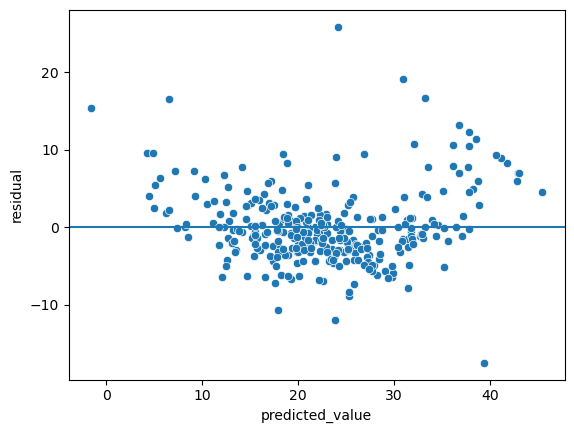

In [88]:
# calculate residuals
residual = y_boston_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

**Observation :**
- Linear assumption satisfied since the plot equally devided below and over 0.
- Variance is stable because there isn't narrowing at the end of the plot.
- Independent since the density of the plot is even.

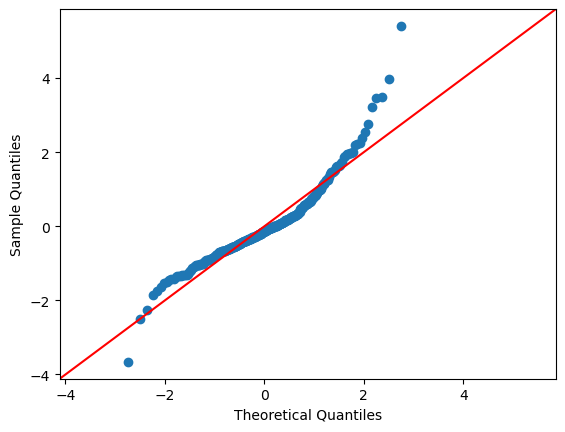

In [89]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

**Observations :**
- Normal but slightly skewed

## Lasso

In [90]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_boston_train)

print('R-squared for lasso training data is {}'.format(r2_score(y_boston_train, y_predict_train)))

R-squared for lasso training data is 0.7056815963218595


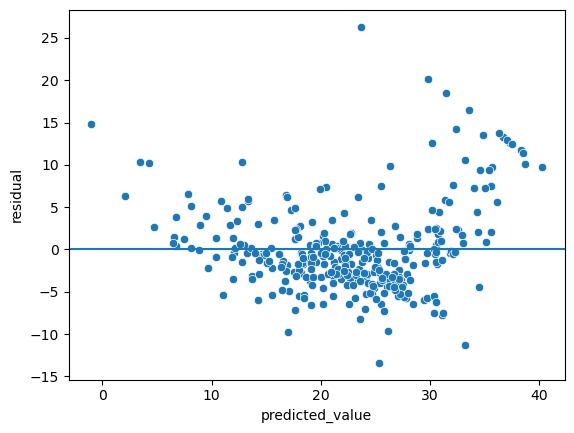

In [91]:
# calculate residuals
residual = y_boston_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

**Observation :**
- Linear assumption satisfied since the plot equally devided below and over 0.
- Variance is not stable because the plot is widen at the end of plot.
- Independent since the density of the plot is even.

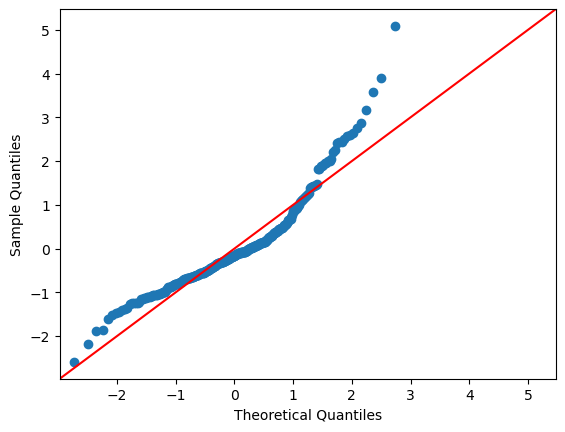

In [93]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

**Observations :**
- Normal but slightly skewed

# Model Evaluation

## Ridge

### Training Error

In [96]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_boston_train)

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for Ridge training data is {}'.format(np.sqrt(mean_squared_error(y_boston_train, y_predict_train))))
print('MAE for Ridge training data is {}'.format(mean_absolute_error(y_boston_train, y_predict_train)))
print('MAPE for Ridge training data is {}'.format(mean_absolute_percentage_error(y_boston_train, y_predict_train)))

RMSE for Ridge training data is 4.778640361040111
MAE for Ridge training data is 3.3776762058865635
MAPE for Ridge training data is 0.16868073663359498


In [98]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_boston_train)

print('R-squared for Ridge training data is {}'.format(r2_score(y_boston_train, y_predict_train)))

R-squared for Ridge training data is 0.748587526366982


**Interpretation :**
- 74.85 % of variability of `medv` is sucessfully explained using all the features in the model.

### Testing Error

In [100]:
# prepare prediction result on test data
X_boston_test = feature_boston_test.to_numpy()
y_predict_test = ridge_best.predict(X_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)))

RMSE for testing data is 5.158908333657056
MAE for testing data is 3.2444816457044983
MAPE for testing data is 0.1761840262676792


**Interpretation :**
- RMSE : The standard deviation of prediction errors is 5.144. i.e. from the regression line, the residuals mostly deviate between +- 5.15
- MAE : On average, our prediction deviates the true `medv` by 3.24.
- MAPE : This 3.24 equivalent to 17.6% deviation relative to true `medv`.

## Lasso

### Training Error

In [104]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_boston_train)

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for Lasso training data is {}'.format(np.sqrt(mean_squared_error(y_boston_train, y_predict_train))))
print('MAE for Lasso training data is {}'.format(mean_absolute_error(y_boston_train, y_predict_train)))
print('MAPE for Lasso training data is {}'.format(mean_absolute_percentage_error(y_boston_train, y_predict_train)))

RMSE for Lasso training data is 5.170346463296143
MAE for Lasso training data is 3.6858416211465084
MAPE for Lasso training data is 0.17491282023638247


In [111]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_boston_train)

print('R-squared for Lasso training data is {}'.format(r2_score(y_boston_train, y_predict_train)))

R-squared for Lasso training data is 0.7056815963218595


**Interpretation :**
- 70.56 % of variability of `medv` is sucessfully explained using all the features in the model.

### Testing Error

In [107]:
# prepare prediction result on test data
X_boston_test = feature_boston_test.to_numpy()
y_predict_test = lasso_best.predict(X_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [108]:
#RMSE, MAE, MAPE

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)))

RMSE for testing data is 5.125494212319777
MAE for testing data is 3.398050710596067
MAPE for testing data is 0.1785660633873221


**Interpretation :**
- RMSE : The standard deviation of prediction errors is 5.15. i.e. from the regression line, the residuals mostly deviate between +- 5.15
- MAE : On average, our prediction deviates the true `medv` by 3.39.
- MAPE : This 3.39 equivalent to 17.8% deviation relative to true `medv`.